# SVM with HOG feature
---------

In [1]:
# import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from skimage import data, color, feature, io
import skimage.data

# HOG sample
------------

In [2]:
# read data
image = color.rgb2gray(data.chelsea())

In [3]:
# extract hog feature
hog_vec, hog_vis = feature.hog(image, visualize=True)

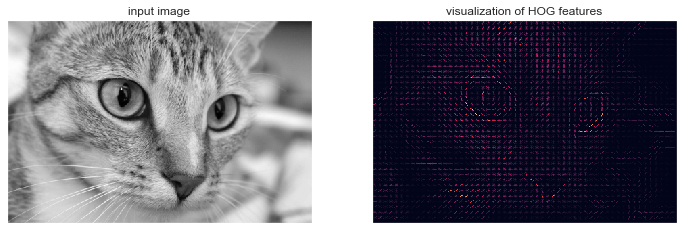

In [4]:
# visualize
fig, ax = plt.subplots(1, 2, figsize=(12, 6), subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('input image')

ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG features');

# Read Face Images
-------------

In [5]:
# read face images
from sklearn.datasets import fetch_lfw_people
dataset = fetch_lfw_people()
faces = dataset.images

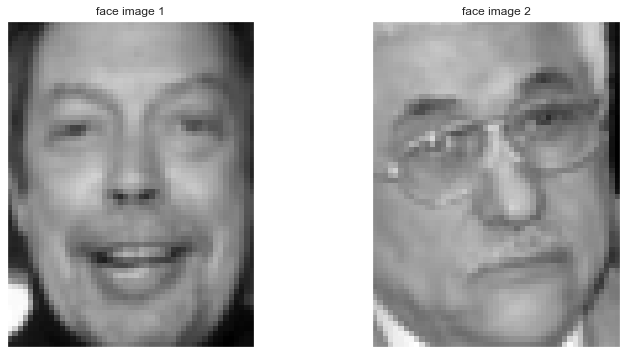

In [6]:
# show face images
fig, ax = plt.subplots(1, 2, figsize=(12, 6), subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(faces[0, :, :], cmap='gray')
ax[0].set_title('face image 1')

ax[1].imshow(faces[1, :, :], cmap='gray')
ax[1].set_title('face image 2');

# Read Non-Face Images
----------------

In [7]:
# read non-face images
from sklearn.datasets import load_sample_images
dataset = load_sample_images()
non_faces_rgb = dataset.images

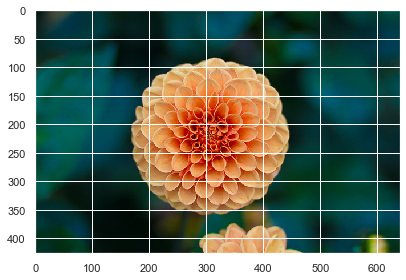

In [8]:
# show non-face images
io.imshow(non_faces_rgb[1])
io.show()

In [9]:
# convert rgb to gray
non_faces = [color.rgb2gray(x) for x in non_faces_rgb]

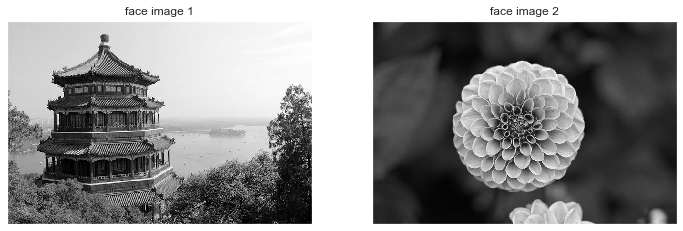

In [10]:
# show  non face images
fig, ax = plt.subplots(1, 2, figsize=(12, 6), subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(non_faces[0], cmap='gray')
ax[0].set_title('face image 1')

ax[1].imshow(non_faces[1], cmap='gray')
ax[1].set_title('face image 2');

In [24]:
# conbine datasets
all_images = [faces[0, :, :], faces[1, :, :], non_faces[0], non_faces[1]]

In [25]:
# create target variables
y = [1, 1, 0, 0]

In [26]:
# create hog features
X = [feature.hog(x).tolist() for x in all_images]

In [34]:
X = [[feature.hog(faces[0, :, :]).tolist()], [feature.hog(faces[1, :, :]).tolist()],  [feature.hog(non_faces[0]).tolist()], [feature.hog(non_faces[1]).tolist()]]

In [35]:
X

[[[0.2554845799551397,
   0.29600386900191195,
   0.07282982722803899,
   0.04647494670652678,
   0.0724129605594158,
   0.021414519004901992,
   0.0,
   0.005183204842051495,
   0.01982897298924459,
   0.10566837388590841,
   0.16427278522650712,
   0.07447749461103542,
   0.027526998578093757,
   0.004576889154269772,
   0.0019892846146870604,
   0.0,
   0.012470790900128285,
   0.042152643623791945,
   0.028759511015355173,
   0.019836890525304404,
   0.02209825526475413,
   0.020298905247939824,
   0.02009321721186544,
   0.0179880379186719,
   0.008629257898617274,
   0.006215626686109788,
   0.018577651225061675,
   0.29600386900191195,
   0.03693010949527865,
   0.007011189148084597,
   0.01457214007707587,
   0.03048614224669476,
   0.014200008250379178,
   0.0036995864730379633,
   0.02606030064434327,
   0.10914035845396065,
   0.02892047620246598,
   0.048944764405136496,
   0.10140926717609716,
   0.13246087108241814,
   0.19117351564247836,
   0.23010944164296557,
   0.064

In [36]:
# close test
y_train, y_test, X_train, X_test = y, y, X, X

In [37]:
# create classification model
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5) 
clf = clf.fit(X_train, y_train)

ValueError: setting an array element with a sequence.

In [38]:
# prediction
y_pred = clf.predict(X_train)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:
# evaluation
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)